In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pandas as pd
from math import pi, sin, cos

(ode:practical_work:duffing_oscillator)=
# Vibrational energy harvesting using a Duffing oscillator

**Author**: Ludovic Charleux (ludovic.charleux@univ-smb.fr)

:::{admonition} Required files
:class: important
In order to display figures properly, please download these images from {cite:ps}`huguet2019`:

* {download}`huguet_experimental_setup.png <huguet_experimental_setup.png>`
* {download}`huguet_model_design.png <huguet_model_design.png>`  

And put it in your working directory along with this notebook. This tutorial is inspired by the PhD work of Thomas Huguet available [here](https://tel.archives-ouvertes.fr/tel-02061864) from the INSA Lyon and the University of Savoie Mont Blanc (defended in 2018). You may download it and read it to better understand the context of this exercise.


:::

## Introduction
In this tutorial, we will study the mecanical behavior of a [bistable oscilator](https://en.wikipedia.org/wiki/Bistability). This means that the system has two stable equilibrium position (think of a light switch).  
The system is then put under a excitation and will oscilate between its two stable position.
It is realized using the principle described on the diagram below :



![](huguet_model_design2.png)

A beam with a mass in its center is compressed to buckling. 
It is then excited by means of a shaker which represents the vibrations present in the environment.  
An electrical extraction circuit is present but will not be modeled in this tutorial.  
The system has been manufactured and tested in the laboratory and is shown in the figure below :

![](huguet_experimental_setup2.png)

The differential equation associated with this system is as follows:

$$
\ddot x + \dfrac{\omega_0^2}{2}\left(\dfrac{x^2}{x_{w}^2} - 1\right)x + \dfrac{\omega_0}{Q} \dot x = A_d \sin \left( \omega_d t \right)
$$


Where:
* The position of the mass, its speed and acceleration are respectively noted $x$, $\dot x$ and $\ddot x$.
* The stable equilibrium position, or **well** position,  is noted $\pm x_{w}$ (noted $x_0$ on the figure above).
* The resonance frequency at the bottom of the well is noted $\omega_0$.
* The quality factor is noted $Q$.
* The excitation is defined by its amplitude $A_d$ and its pulsation $\omega_d = 2 \pi f_d$ where $f_d$ is its frequency.

We will discuss some interesting aspects of the bistable oscillator, including: 
* Its ability to have several different solutions for the same excitation.
* Its ability to respond chaotically in some cases.

The numerical values of these parameters are defined here:

In [2]:
xw = 0.5e-3  # meters
w0 = 121.0  # radians per second
Q = 87.0  # dimensionless
fd = 50.0  # Hertz
wd = 2.0 * pi * fd
Ad = 2.5  # meters per second squared

## Part 1: ODE reformulation

First, you are asked to reformulate the ODE to first order using the standard form seen in the course:

$$
\dot X = f(X, t)
$$

With:

$$
X = \begin{bmatrix}
x_0 \\
x_1
\end{bmatrix}
= \begin{bmatrix}
x \\
\dot x
\end{bmatrix}

$$

And, as a consequence:

$$
\dot X = \begin{bmatrix}
\dot x_0 \\
\dot x_1
\end{bmatrix}
= \begin{bmatrix}
\dot x \\
\ddot x
\end{bmatrix}
$$

Complete the function in the following cell :

As a reminder here's the equation 
$$
\ddot x + \dfrac{\omega_0^2}{2}\left(\dfrac{x^2}{x_{w}^2} - 1\right)x + \dfrac{\omega_0}{Q} \dot x = A_d \sin \left( \omega_d t \right)
$$

In [ ]:
## COMPLETE THIS CELL

def f(X, t):
    """
    Duffing equation.
    """
    x, dotx = X
    dotX = np.zeros(2)
    ## COMPLETE
    # dotX[0] = 
    # dotX[1] = 
    return dotX

## Part 2: Time integration

### Integration

In order to intergrate the newly created function, we will use **the [solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp) function** of scipy.integrate.

Integrate the equation with respect to time from a point $Y_0$ of your choice (the initial state). \
The intergration will start at $t_0= 0$ and will last for $N_t = 1000$ periods. We will then evaluate the function $N_F = 180$ time per period : $t_{eval}$ = [$t_0$, $\frac{T}{180}$, $\frac{2T}{180}$, $\frac{3T}{180}$, ... , $t_f$]  
(You may use the [linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) function of numpy).

In [ ]:
## COMPLETE THIS CELL

## SETUP
Td = 1/fd  # PERIOD DURATION
# NT =  # NUMBER OF PERIODS
# NF =  # FRAMES PER EXCITATION PERIODS
# t =
X0 = np.array([0.0, 0.0])  # CHANGE THE VALUES TO YOUR LIKING
# sol = sci.solve_ivp(fun= , t_span= ,y0= , t_eval=)
# x = 
# dotx =

NameError: name 'NF' is not defined

### Amplitude *vs.* time

We will now plot the results as a function of time.  
First, try plotting **the normalized the position of the mass $\frac{x}{x_w}$** as a function of time using **the [plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) function** of matplotlib.pyplot.
In blue, plot the normalized the position for <span style="color:blue">the whole solution </span> while <span style="color:red">the last 5 periods </span> will be ploted in red.  
  
**Remark**: have a look at the [Numpy slicing tutorial](https://numpy.org/doc/stable/user/basics.indexing.html#slicing-and-striding) 

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(1, 2, 1)
plt.title("Whole solution")
# plt.plot(x= ,y= ,color= , label = "Whole solution")
# plt.plot(x= ,y= ,color= ,label = "Last 5 periods")
plt.grid()
plt.legend()
plt.xlabel("Time, $t/T_d$")
plt.ylabel("Position $x/x_{w}$")
ax2 = fig.add_subplot(1, 2, 2)
plt.title("Steady state")
# plt.plot(x= ,y= ,color= ,label = "Last 5 periods")
plt.grid()
plt.legend()
plt.xlabel("Time, $t/T_d$")
plt.show()

### Phase plane

Plot the resulting trajectory in **the phase plane $(\frac{x}{x_w}, \frac{\dot x}{x_w \omega_0})$**.  
As in the last plot, <span style="color:blue">the whole solution</span> will be ploted in blue while <span style="color:red">the last 5 periods</span> will be plotted in red.

In [ ]:
plt.figure()
# plt.plot(x= ,y= ,color= , label = "Transient regime")
# plt.plot(x= ,y= ,color= , label = "Steady state")
plt.grid()
plt.xlabel("Position $x/x_{w}$")
plt.ylabel("Speed, $\dot x / {\omega_d x_{w}}$")
plt.show()

Depending on your starting point, the trajectory may lead to a different steady state regime.

**Questions**:
* Interpret the graphs obtained. In particular, emphasize the differences between transient and steady-state conditions. Does the latter depend on the same frequency as the acceleration imposed on the system? Is there more than one steady state? If so, how can you identify them all?
* Propose ways to extract information on the dynamic behavior of this system.  
  
**Answers**:

## Part 3: Poincaré sections and attractors 

The [Poincaré section](https://en.wikipedia.org/wiki/Poincar%C3%A9_map) is a tool developed by Henri Poincaré to observe and analyze the behavior of an integral curve. 

A **temporal Poincaré section** is defined by observing the system **at times separated by one period \(T\)**, i.e. at $t = n T_d$, $n\in \mathbb{N}$   $\Leftrightarrow$ $[0, T_d, 2T_d, ..., N_t T_d]$.  .  

At each period, **the point \((x(t), v(t))\) is plotted in phase space**. This transformes the continuous motion into a **discrete set of points** that clearly reveals whether the dynamics is periodic, quasi-periodic, or chaotic.

To do this, we will **construct two new lists, `xp` and `dotxp`, extracted from `x` and `dotx`**, which store the position and velocity values **sampled at each period**.  
These lists contain the coordinates of the points that form the **Poincaré section**.

Once again, plot <span style="color:blue">the whole solution</span> in blue and <span style="color:red">the last 5 periods</span> in red.


**Remark**: have a look at the [Numpy slicing tutorial](https://numpy.org/doc/stable/user/basics.indexing.html#slicing-and-striding) 

<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
C:\Users\user\AppData\Local\Temp\ipykernel_1380\129373066.py:11: SyntaxWarning: invalid escape sequence '\d'
  plt.ylabel("Speed, $\dot x / {\omega_d x_{w}}$")


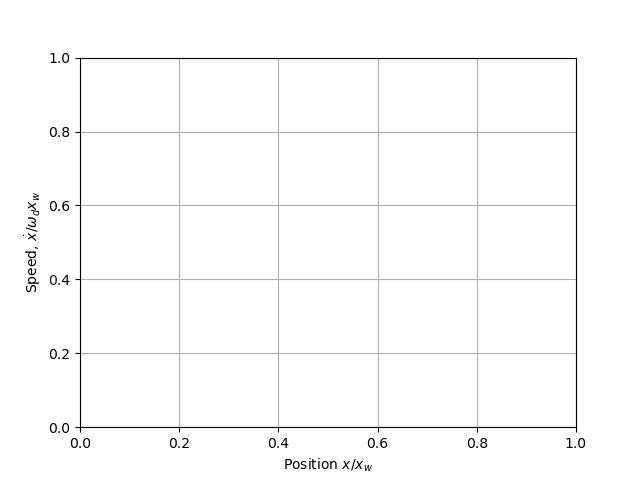

In [ ]:
# POINCARE SECTION
# xp = # COMPLETE
# dotxp =  # COMPLETE

plt.figure()
# plt.scatter(x= ,y= ,color= , marker= , s = ,label = "Poincaré Section")
# plt.scatter(x= ,y= ,color= , marker= , s = ,label = "Attractors")
plt.grid()
plt.legend()
plt.xlabel("Position $x/x_{w}$")
plt.ylabel("Speed, $\dot x / {\omega_d x_{w}}$")
plt.show()
# plt.close("all")

The Poincaré section indicates that the trajectory of **the system in the phase plane is a convergence to one (or more) particular points called attractors**. Change the values of $Y_0$ and try to find different attractors. 

**Hint**: try these start points

In [ ]:
Y0 = np.array([-4.0 * xw, 3.0 * xw * w0])
Y0 = np.array([-4.0 * xw, 5.0 * xw * w0])
Y0 = np.array([-3.0 * xw, 4.0 * xw * w0])
Y0 = np.array([-3.0 * xw, 5.0 * xw * w0])
Y0 = np.array([-7.0 * xw, 20.0 * xw * w0])

**Note**: write down a list of the attractors that you have found, you will used them in the next part.

In [7]:
attractors = []  # A LIST OF ATTRACTORS

**Bonus Question:**  

How would you explain that the system can converge towards multiple attractors at the same time ?

**Answers**:

## Part 4: Chaos and strange attractor

We now propose to study the system using a **different excitation frequency**.  In this case, you will observe that the **Poincaré section  does not always converge to a point**: **it may instead converge to a surface** called a [strange attractor](https://en.wikipedia.org/wiki/Attractor#Strange_attractor).

Make this strange attractor obvious by drawing the Poincaré sections.

To do so, reuse the methods and tools introduced in this tutorial, but apply them to the **new set of parameters** given below.

In [8]:
#NT =  # NUMBER OF EXCITATION PERIODS
#NF =  # FRAMES PER EXCITATION PERIODS
fd = 25.0  # Hertz
omegad = 2.0 * pi * fd
Td = fd**-1  # EXCITATION FREQUENCY

# CODE HERE

<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
C:\Users\user\AppData\Local\Temp\ipykernel_1380\3825634941.py:6: SyntaxWarning: invalid escape sequence '\d'
  plt.ylabel("Speed, $\dot x / {\omega_d x_{w}}$")


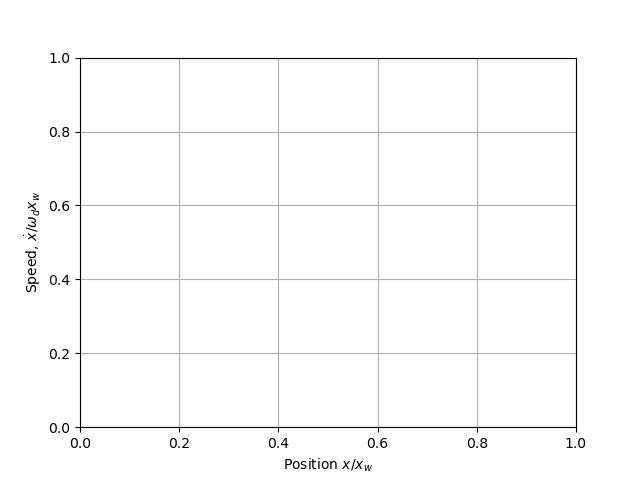

In [9]:
plt.figure()
# plt.scatter(x= ,y= ,color= , marker= , s = ,label = "Poincaré Section")
# plt.scatter(x= ,y= ,color= , marker= , s = ,label = "Attractors")
plt.grid()
plt.xlabel("Position $x/x_{w}$")
plt.ylabel("Speed, $\dot x / {\omega_d x_{w}}$")
plt.show()